In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

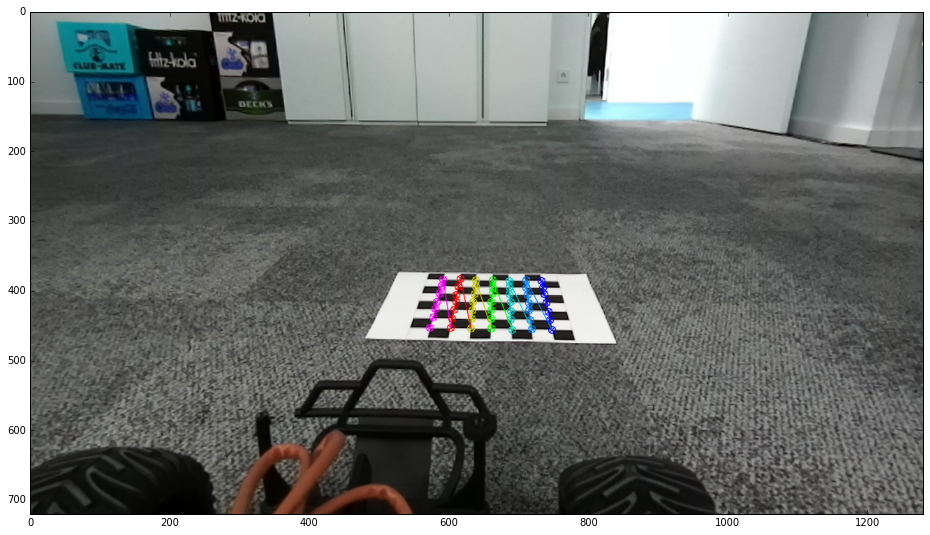

In [2]:
board_img = cv2.imread('chessboard.png')
points_per_row = 7  # number of inner points
points_per_column = 7
found, corners = cv2.findChessboardCorners(board_img, (points_per_row, points_per_column))
cv2.drawChessboardCorners(board_img, (points_per_row, points_per_column), corners, found)
plt.figure(figsize=(18, 9))
_ = plt.imshow(board_img)

In [3]:
img_h, img_w = board_img.shape[1], board_img.shape[0]
dest_board_w = 150
dest_board_h = 150

obj_points = np.array([
    (img_h/2+dest_board_h/2, img_w/2-dest_board_w/2), 
    (img_h/2+dest_board_h/2, img_w/2+dest_board_w/2), 
    (img_h/2-dest_board_h/2, img_w/2-dest_board_w/2), 
    (img_h/2-dest_board_h/2, img_w/2+dest_board_w/2)], dtype=np.float32)

img_points = np.array([corners[0], 
                       corners[points_per_column-1], 
                       corners[(points_per_column-1) * points_per_row], 
                       corners[(points_per_column-1) * points_per_row + points_per_column-1]]).squeeze()

In [4]:
t = cv2.getPerspectiveTransform(img_points, obj_points)

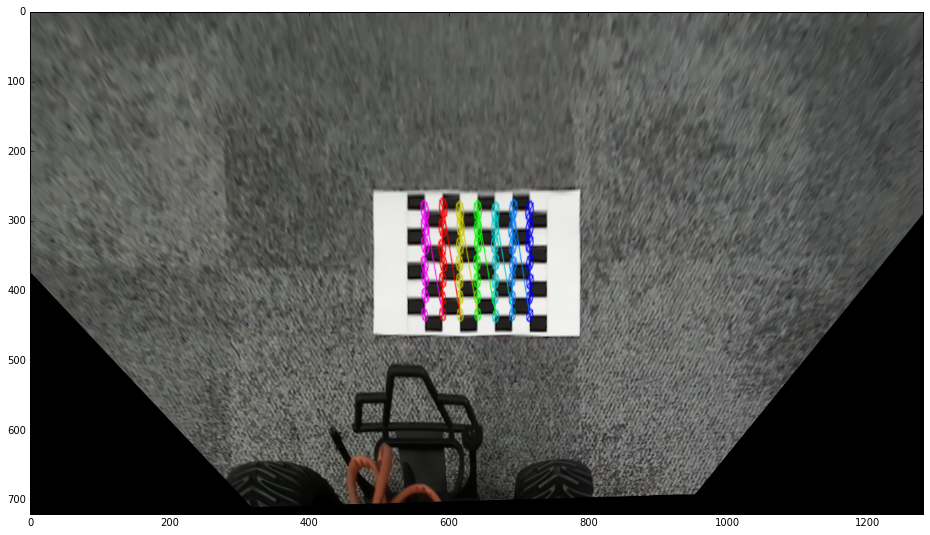

In [5]:
plt.figure(figsize=(18, 9))
_ = plt.imshow(cv2.warpPerspective(board_img, t, (img_h, img_w)))

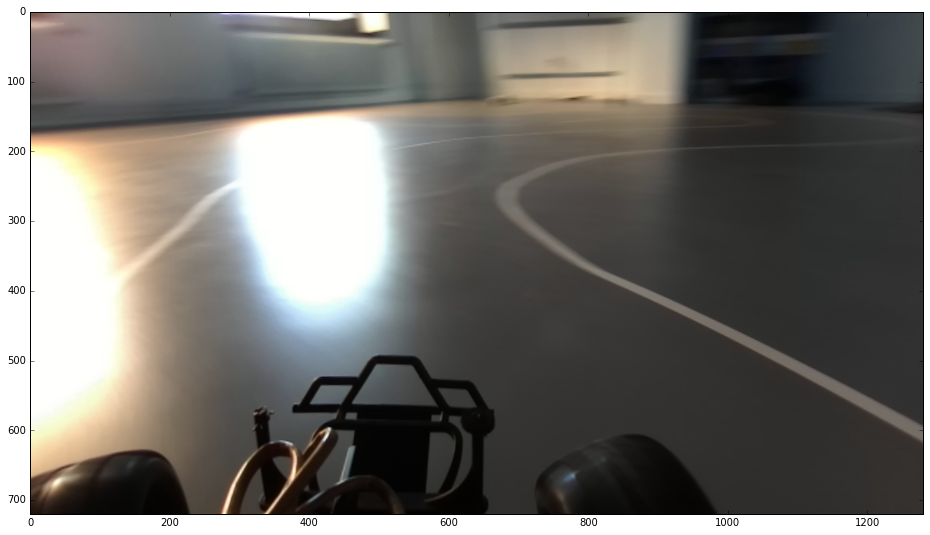

In [6]:
img = cv2.imread('camera_sample.png')
plt.figure(figsize=(18, 9))
_ = plt.imshow(img)

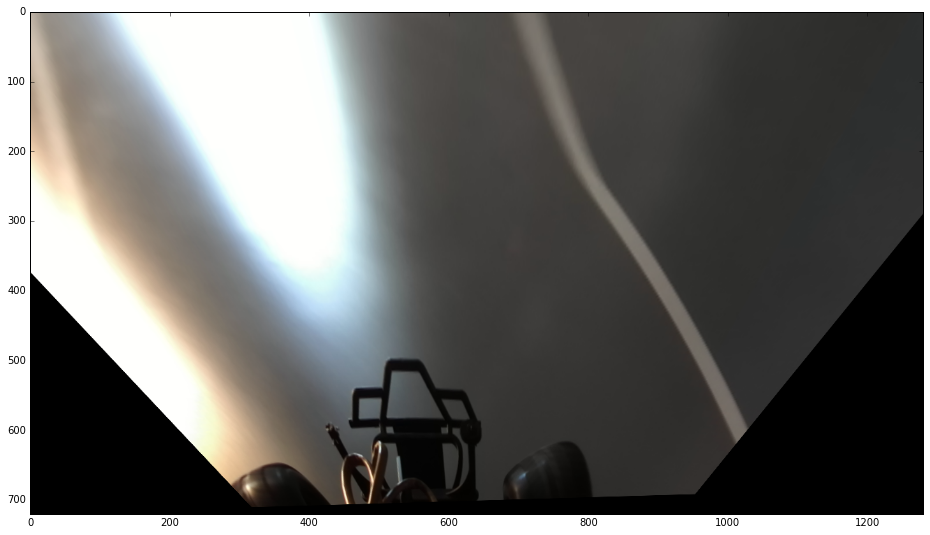

In [7]:
plt.figure(figsize=(18, 9))
bev_image = cv2.warpPerspective(img, t, (img_h, img_w))
_ = plt.imshow(bev_image)

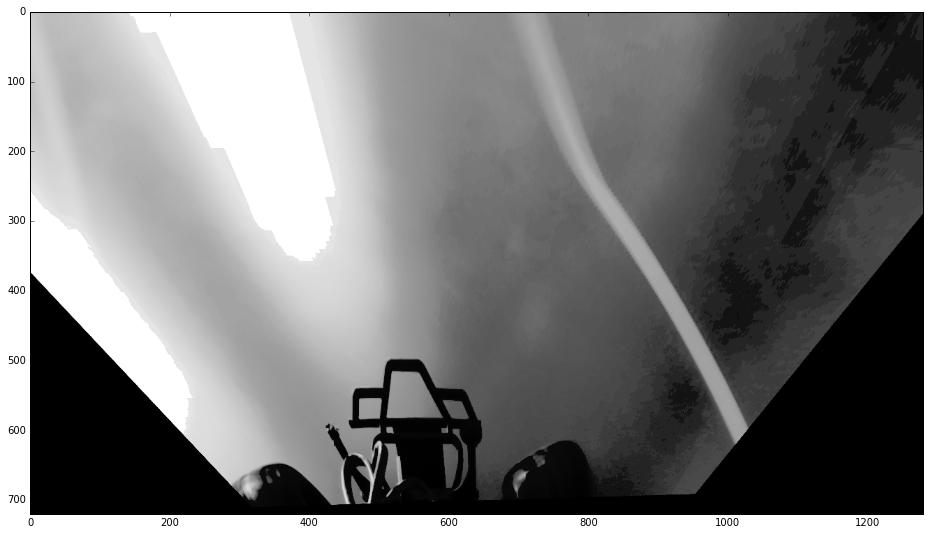

In [8]:
image_grey = cv2.cvtColor(bev_image, cv2.COLOR_RGB2GRAY)
norm_image_global = cv2.equalizeHist(image_grey)
plt.figure(figsize=(18, 9))
_ = plt.imshow(norm_image_global, cmap='gray')

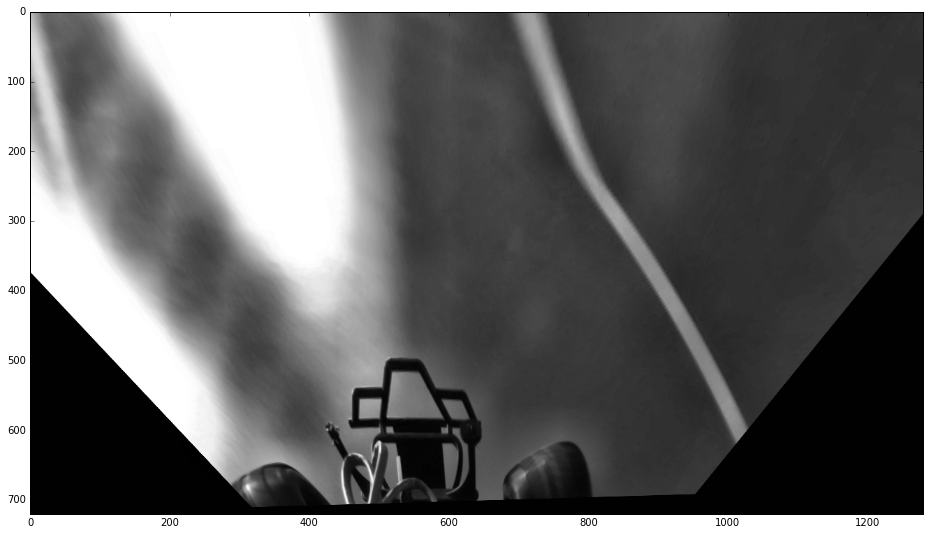

In [9]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))
norm_image_cl = clahe.apply(image_grey)

plt.figure(figsize=(18, 9))
_ = plt.imshow(norm_image_cl, cmap='gray')